<h3>Task 1 - Investigate and Analyze Price Data</h3>
Learn about commodities markets and demonstrate data analysis skills

### Here is the background information on your task
You are a quantitative researcher working with a commodity trading desk. Alex, a VP on the desk, wants to start trading natural gas storage contracts. However, the 
available market data must be of higher quality to enable the instrument to be priced accurately. They have sent you an email asking you to help extrapolate the 
data available from external feeds to provide more granularity, considering seasonal trends in the price as it relates to months in the year. To price the contract, 
we will need historical data and an estimate of the future gas price at any date.

Commodity storage contracts represent deals between warehouse (storage) owners and participants in the supply chain (refineries, transporters, distributors, etc.). 
The deal is typically an agreement to store an agreed quantity of any physical commodity (oil, natural gas, agriculture) in a warehouse for a specified amount of 
time. The key terms of such contracts (e.g., periodic fees for storage, limits on withdrawals/injections of a commodity) are agreed upon inception of the contract 
between the warehouse owner and the client. The injection date is when the commodity is purchased and stored, and the withdrawal date is when the commodity is 
withdrawn from storage and sold. More details can be found here: 

 - Understanding Commodity Storage - https://www.cmegroup.com/education/courses/introduction-to-energy/introduction-to-crude-oil/understanding-commodity-storage.html

A client could be anyone who would fall within the commodities supply chain, such as producers, refiners, transporters, and distributors. This group would also 
include firms (commodities trading, hedge funds, etc.) whose primary aim is to take advantage of seasonal or intra-day price differentials in physical commodities. 
For example, if a firm is looking to buy physical natural gas during summer and sell it in winter, it would take advantage of the seasonal price differential 
mentioned above. The firm would need to leverage the services of an underground storage facility to store the purchased inventory to realize any profits from this 
strategy.

### Here is your task
After asking around for the source of the existing data, you learn that the current process is to take a monthly snapshot of prices from a market data provider, 
which represents the market price of natural gas delivered at the end of each calendar month. This data is available for roughly the next 18 months and is combined 
with historical prices in a time series database. After gaining access, you are able to download the data in a CSV file.

You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client 
needs an indicative price for a longer-term storage contract.

 - Download the monthly natural gas price data.
 - Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
 - Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
 - Your code should take a date as input and return a price estimate.

Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year 
for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.

Note: This role often requires the knowledge and utilization of data analysis and machine learning. Python is a useful tool and one that JPMorgan Chase uses a lot 
in quantitative research since it’s capable of completing complex tasks.

In [51]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
# read the data
nat_gas = pd.read_csv("Nat_Gas.csv")
nat_gas.shape

(48, 2)

In [53]:
# let's see some records from our data
nat_gas.head(10)

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [54]:
nat_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [55]:
# let's convert "Dates" into a datetime
nat_gas['Dates'] = pd.to_datetime(nat_gas['Dates'])
nat_gas.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [56]:
nat_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [57]:
# check for null values
nat_gas.isnull().sum()

Dates     0
Prices    0
dtype: int64

In [58]:
# duplicate records
nat_gas.duplicated().sum()

0

In [59]:
# descriptive statistics
nat_gas.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


In [60]:
# set index as Dates
nat_gas.set_index("Dates", inplace=True, drop=True) 
nat_gas.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


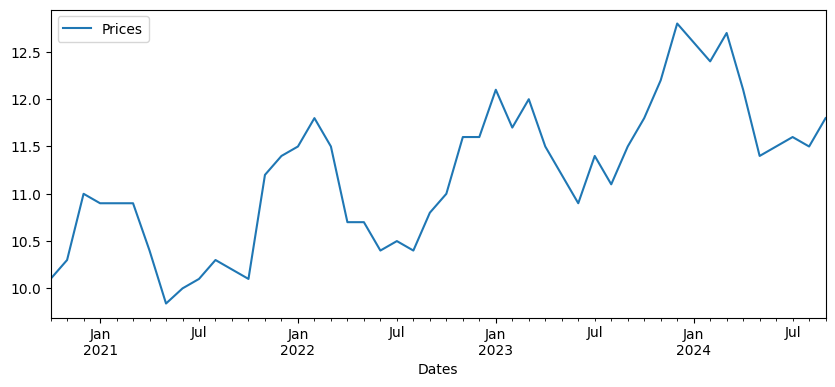

In [61]:
# plot the prices
nat_gas.plot(figsize=(10,4))
plt.show()

As it is evident from the above plot the data is not stationary.

In [62]:
# now we will check if the data is stationary or not using dickey-fuller test
from statsmodels.tsa.stattools import adfuller

In [63]:
def adfuller_test(sample):
    result = adfuller(sample)
    print("ADF statistic: {}".format(result[0]))
    print("p-value: {}".format(result[1]))
    print("Critical Values:")
    for key, value in result[4].items():
        print(key, value)
        
    if result[1] <= 0.5:
        print("the data does not have a unit root and is stationary")
    else:
        print("the data has a unit root and is non-stationary")

In [64]:
adfuller_test(nat_gas['Prices'])

ADF statistic: 0.21807686170000193
p-value: 0.9732574388448694
Critical Values:
1% -3.6209175221605827
5% -2.9435394610388332
10% -2.6104002410518627
the data has a unit root and is non-stationary
